Importing Dependecies

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")


Data Collection

In [33]:
# Loading the dataset in a pandas Dataframe 
wine_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/WineQT.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [34]:
# Checking the number of rows and column 
wine_data.shape

(1143, 13)

In [35]:
# Checking for missing values 
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### Data Analysis and Visualization

In [36]:
# Basic statistical masures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


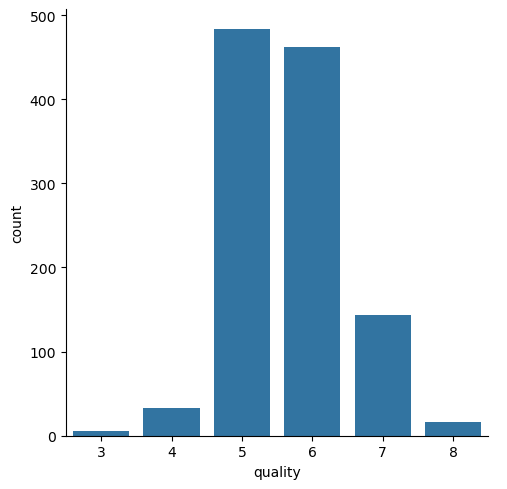

In [37]:
# number of values for each quality 
sns.catplot(x='quality', data=wine_data, kind='count')

 Volatile acidity vs Quality 

<Axes: xlabel='quality', ylabel='volatile acidity'>

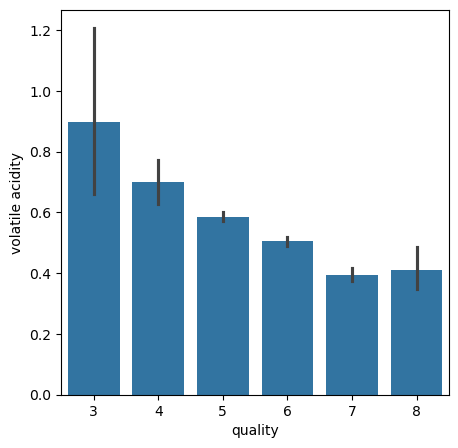

In [38]:
# Volatile acidity vs Quality 
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_data)

Citric Acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

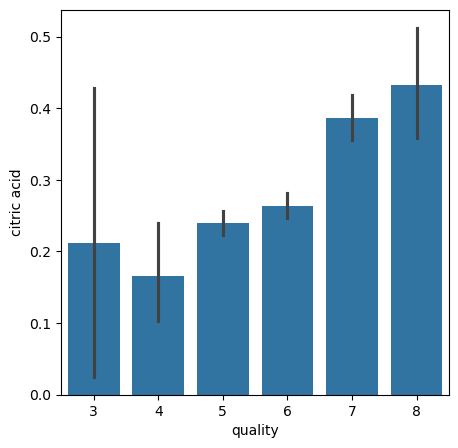

In [39]:
# citric acid vs Quality 
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_data)

Correlation

In [40]:
correlation = wine_data.corr()

<Axes: >

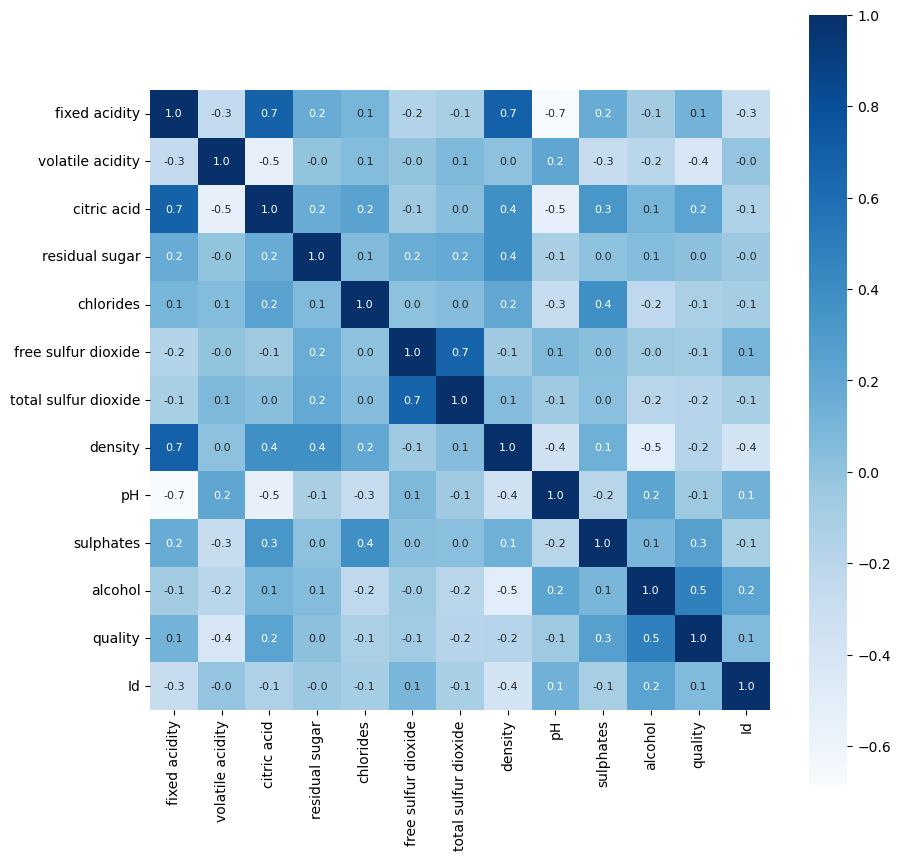

In [41]:
# constructing heapmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#### Data Preprocessing

In [42]:
# seperate the data and labels 
X = wine_data.drop(columns=['quality','Id'], axis=1)
Y = wine_data['quality']

In [43]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  ...  density    pH  sulphates  alcohol
0               7.4             0.700         0.00             1.9  ...  0.99780  3.51       0.56      9.4
1               7.8             0.880         0.00             2.6  ...  0.99680  3.20       0.68      9.8
2               7.8             0.760         0.04             2.3  ...  0.99700  3.26       0.65      9.8
3              11.2             0.280         0.56             1.9  ...  0.99800  3.16       0.58      9.8
4               7.4             0.700         0.00             1.9  ...  0.99780  3.51       0.56      9.4
...             ...               ...          ...             ...  ...      ...   ...        ...      ...
1138            6.3             0.510         0.13             2.3  ...  0.99574  3.42       0.75     11.0
1139            6.8             0.620         0.08             1.9  ...  0.99651  3.42       0.82      9.5
1140            6.2             0.600

In [44]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


Label Binarization

In [45]:
Y = Y.apply(lambda y_value: 1 if y_value >= 6 else 0)

In [46]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int64


Train Test Split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1143, 11) (914, 11) (229, 11)


#### Model Training and Evaluation

Random Forest Classifier

In [49]:
model = RandomForestClassifier()

In [50]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [51]:
X_test_prediction = model.predict(X_test)
# accuracy score on test data 
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy :", test_data_accuracy)

Accuracy : 0.8122270742358079


#### Building a Predictive System

In [52]:
input_data = [7.4,	0.7,	0,	1.9,	0.076,	11,	34,	0.9978,	3.51,	0.56,	9.4]

# Changing the input data to a numpy array 
input_data = np.asarray(input_data)

# reshape the data becasuse we are predicting one instance 
input_data = input_data.reshape(1, -1)

prediction = model.predict(input_data) 

if prediction[0]==1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine
